In [4]:
! pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com, https://download.pytorch.org/whl/cu113
     |████████████████████████████████| 22.3 MB 1.3 MB/s eta 0:00:01
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0a0
    Uninstalling torchvision-0.12.0a0:
      Successfully uninstalled torchvision-0.12.0a0


In [12]:
! pip install torchvision

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [13]:
import gradio
import torchaudio
from fastai.vision.all import *
from fastai.learner import load_learner
from torchvision.utils import save_image
from huggingface_hub import hf_hub_download

In [4]:
base_folder = Path("../input/kaggle-pog-series-s01e02")

items = get_files(base_folder, extensions=".ogg")

In [6]:
items

(#24985) [Path('../input/kaggle-pog-series-s01e02/test/000003.ogg'),Path('../input/kaggle-pog-series-s01e02/test/000006.ogg'),Path('../input/kaggle-pog-series-s01e02/test/000008.ogg'),Path('../input/kaggle-pog-series-s01e02/test/000011.ogg'),Path('../input/kaggle-pog-series-s01e02/test/000017.ogg'),Path('../input/kaggle-pog-series-s01e02/test/000023.ogg'),Path('../input/kaggle-pog-series-s01e02/test/000024.ogg'),Path('../input/kaggle-pog-series-s01e02/test/000031.ogg'),Path('../input/kaggle-pog-series-s01e02/test/000032.ogg'),Path('../input/kaggle-pog-series-s01e02/test/000036.ogg')...]

In [7]:
N_FFT = 2048
HOP_LEN = 1024


def create_spectrogram(filename):
    audio, sr = torchaudio.load(filename)
    specgram = torchaudio.transforms.MelSpectrogram(
        sample_rate=sr,
        n_fft=N_FFT,
        win_length=N_FFT,
        hop_length=HOP_LEN,
        center=True,
        pad_mode="reflect",
        power=2.0,
        norm="slaney",
        onesided=True,
        n_mels=224,
        mel_scale="htk",
    )(audio).mean(axis=0)
    specgram = torchaudio.transforms.AmplitudeToDB()(specgram)
    specgram = specgram - specgram.min()
    specgram = specgram / specgram.max()

    return specgram

In [8]:
filename = items[2]
spec_default = create_spectrogram(filename)

In [9]:
filename

Path('../input/kaggle-pog-series-s01e02/test/000008.ogg')

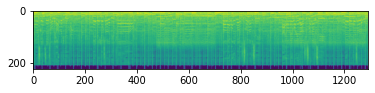

In [11]:
plt.imshow(spec_default)

In [22]:
def create_image(filename):
    specgram = create_spectrogram(filename)
    dest = Path("input/temp.png")
    save_image(specgram, "temp.png")

In [23]:
create_image(filename)

In [24]:
! ls

PytorchAudioInference.ipynb  music-genre-spectrogram-pogchamps	      temp.png
kaggle-pog-series-s01e02     music-genre-torch-melspec-generator.log


In [26]:
learn = load_learner("music-genre-spectrogram-pogchamps/spectograms/model.pkl")

In [31]:
labels = learn.dls.vocab

In [32]:
def predict(img):
    img = PILImage.create(img)
    _pred, _pred_w_idx, probs = learn.predict(img)
    labels_probs = {labels[i]: float(probs[i]) for i, _ in enumerate(labels)}
    return labels_probs

In [33]:
predict("temp.png")

{'Ambient Electronic': 0.018784182146191597,
 'Blues': 0.001689370721578598,
 'Chiptune / Glitch': 0.009157774038612843,
 'Classical': 0.0018330742605030537,
 'Country': 0.015161271207034588,
 'Easy Listening': 0.000761857838369906,
 'Electronic': 0.043093256652355194,
 'Experimental': 0.01893473044037819,
 'Folk': 0.03622647374868393,
 'Hip-Hop': 0.012909098528325558,
 'Instrumental': 0.03738876059651375,
 'International': 0.007503754459321499,
 'Jazz': 0.002992472844198346,
 'Old-Time / Historic': 0.0014046949800103903,
 'Pop': 0.14049866795539856,
 'Punk': 0.1848350614309311,
 'Rock': 0.4632216989994049,
 'Soul-RnB': 0.002242171438410878,
 'Spoken': 0.0013616250362247229}